In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def F_mot(norm, theta, phi) : 
    F = np.zeros(3)
    F[0] = norm*np.sin(theta)*np.cos(phi)
    F[1] = norm * np.sin(theta)*np.sin(phi)
    F[2] = norm * np.cos(theta)

    return F



def translation(Motors, law):
    n_motors = Motors.shape[0]
    Motors_cart = np.zeros((n_motors,3))
    for i, motor in enumerate(Motors[:, :3]) :
         Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    return np.dot(law, Motors_cart)


def rotation(Motors, mass_center, geom_center, law) :
    n_motors = Motors.shape[0]
    Motors_cart = np.zeros((n_motors,3))
    Motors_pos = Motors[:, 3:]
    Motors_dyn = Motors[:, :3]
    
    for i, motor in enumerate(Motors_dyn) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    
    geom = geom_center - mass_center

    # torque = np.cross(geom, Motors_cart, 1, 1)

    torque_G = np.zeros((n_motors,3))
    torque_O = np.zeros((n_motors,3))
    for i, motor in enumerate(Motors):
        torque_G[i, :] = np.cross(Motors_pos[i, :] - geom_center, Motors_cart[i, :])
        torque_O[i, :] =  torque_G[i, :] + np.cross(geom, Motors_cart[i, :])
    return np.dot(law, torque_O)    

def printT(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Tx", "Ty", "Tz"])
    df = df.round(2)
    print(df)
    
 
def printR(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Rx", "Ry", "Rz"])
    df = df.round(2,)
    print(df)   

def printM(Motors, mass_center, geom_center, laws):
    print("For these laws the translations would be :")
    Translations = translation(Motors, laws)
    printT(Translations)
    print("\n")
    print("and the rotations :")
    Rotations = rotation(Motors, mass_center, geom_center, laws)
    printR(Rotations)
pi = np.pi

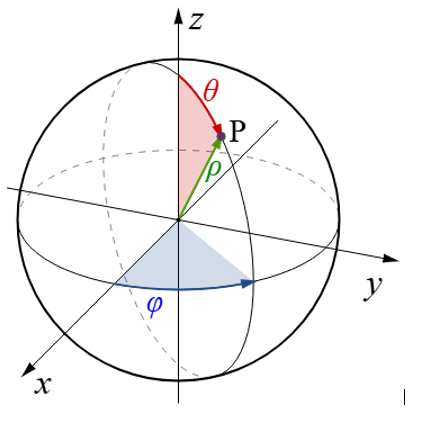

Il faut échanger les angles $\theta$ et $\phi$

$\theta$ : polar angle

$\phi$ : azimuthal angle

In [4]:
# Coordinate [x, y, z]
geom_center = [0, 0, 0] # Origin of the referential
mass_center = [0.256, 1, 0.209] # Mass center of the robot
mass_center = np.array(mass_center)
geom_center = np.array(geom_center)
L, l, h, a = 0.68, 0.40 ,0.40, 0.065        # a: position of the motors in the y,z axis

# Motor [power, theta, phi, x, y, z]
# theta is the polar angle and phi is the azimuthal one.
Motor_1 = [1,   pi/2,   pi,    0,   -l/2+a,   h-a]
Motor_2 = [1,   pi/2,   0,     0,   -l/2+a,   0+a]
Motor_3 = [1,   pi/2,   0,     0,   l/2-a,    0+a]
Motor_4 = [1,   pi/2,   pi,    0,   l/2-a,    h-a]
#Motor_5 = [1, 3*pi/4, 3*pi/4, -L, -l, h]
#Motor_6 = [1, pi/4, 3*pi/4, -L, -l, -h]
#Motor_7 = [1, 3*pi/4, pi/4, L, -l, h]
#Motor_8 = [1, pi/4, pi/4, L, -l, -h]
#Motors = np.array([Motor_1,Motor_2, Motor_3, Motor_4, Motor_5, Motor_6, Motor_7, Motor_8])

Motors = np.array([Motor_1, Motor_2, Motor_3, Motor_4]) 

print(Motors)

[[ 1.          1.57079633  3.14159265  0.         -0.135       0.335     ]
 [ 1.          1.57079633  0.          0.         -0.135       0.065     ]
 [ 1.          1.57079633  0.          0.          0.135       0.065     ]
 [ 1.          1.57079633  3.14159265  0.          0.135       0.335     ]]


In [188]:
# law = [% of motor 1 activation, % of motor 2 activation, ....] len has to be the same has Motors
lois_translation = np.array([
    # [ 1,  1, -1, -1, -1, -1,  1,  1], #Tx
    # [ 1,  1,  1,  1, -1, -1, -1, -1], #Ty
    # [-1,  1, -1,  1, -1,  1, -1,  1] #Tz

    [-1,  1,  1, -1 ], #Tx
    [ 0,  0,  0,  0 ], #Ty
    [ 0,  0,  0,  0 ]  #Tz
]) 

printM(Motors, mass_center, geom_center, lois_translation)

For these laws the translations would be :
        Tx   Ty   Tz
Law 0  4.0 -0.0  0.0
Law 1  0.0  0.0  0.0
Law 2  0.0  0.0  0.0


and the rotations :
        Rx    Ry   Rz
Law 0  0.0 -0.04  4.0
Law 1  0.0  0.00  0.0
Law 2  0.0  0.00  0.0


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


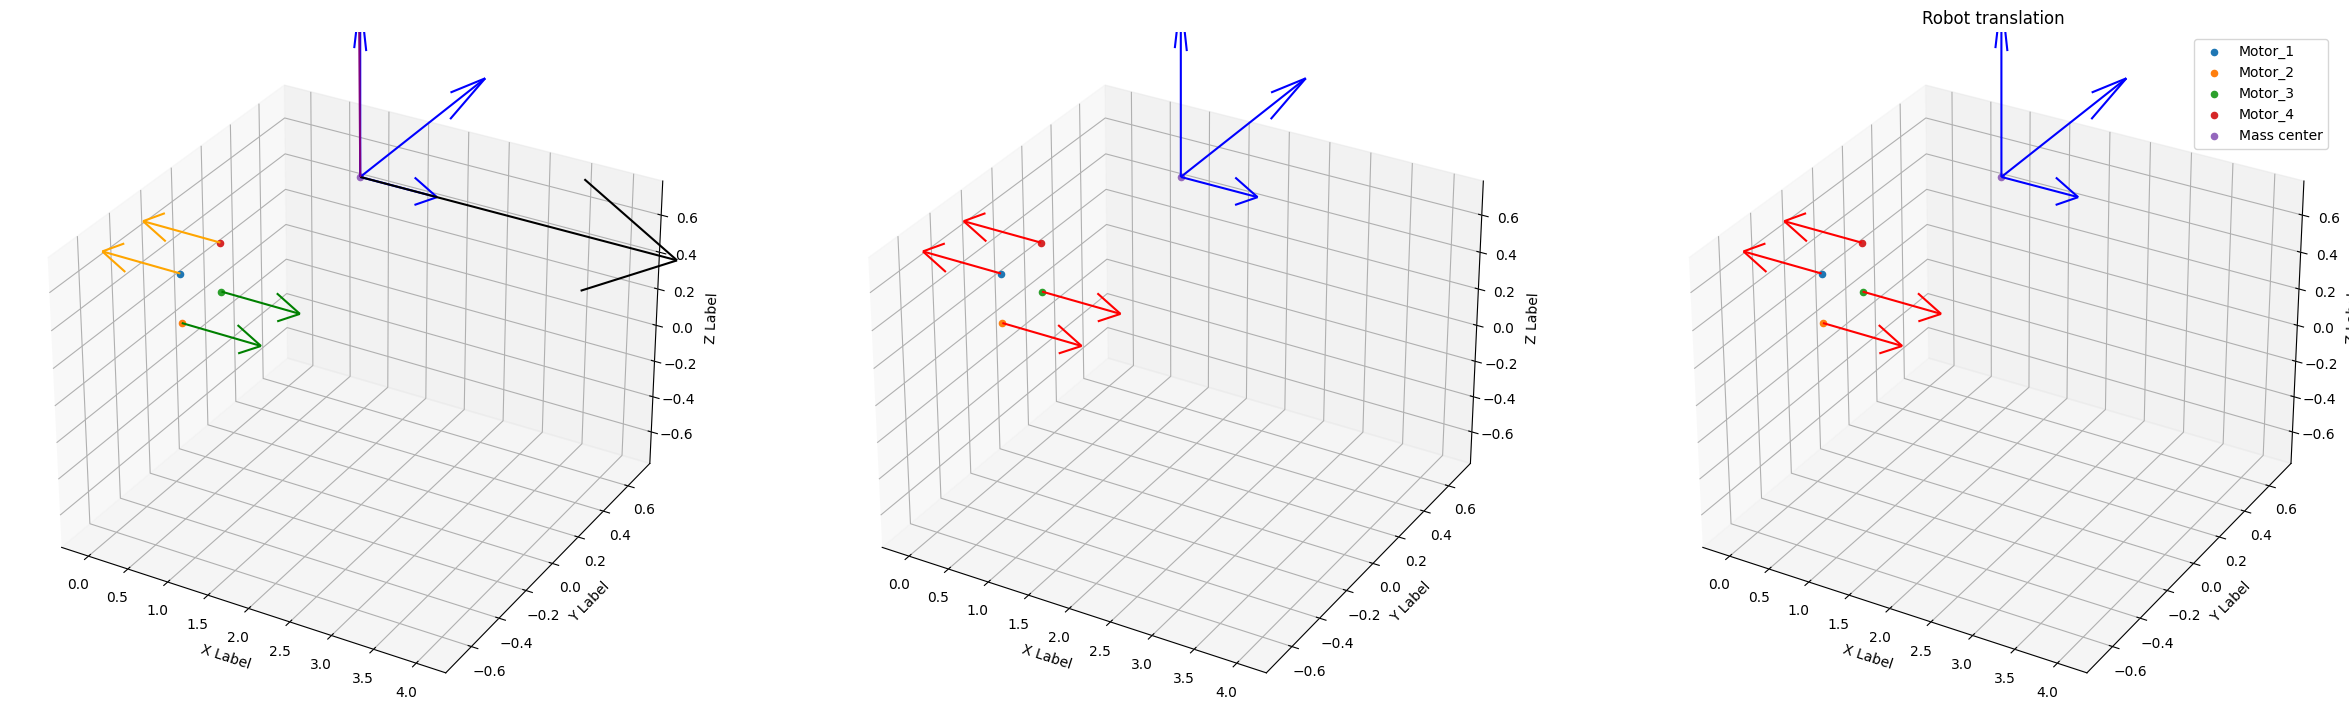

Saved in robot_trans.pdf


In [189]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_translation)
resltR = rotation(Motors, mass_center, geom_center, lois_translation)
for k in range(len(lois_translation)):
    ax = fig.add_subplot(1, len(lois_translation), k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.25, 4.25)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        
        if lois_translation[k][i] == 1:
            color = 'green'
        elif lois_translation[k][i] == -1:
            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[i+4][3]], [Motors[i][4], Motors[i+4][4]], [Motors[i][5], Motors[i+4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[(i+1)%4][3]], [Motors[i][4], Motors[(i+1)%4][4]], [Motors[i][5], Motors[(i+1)%4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i+4][3], Motors[(i+1)%4+4][3]], [Motors[i+4][4], Motors[(i+1)%4+4][4]], [Motors[i+4][5], Motors[(i+1)%4+4][5]], color = 'black')       



    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')



    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Robot translation")
plt.savefig("robot_trans.pdf")
plt.show()
print("Saved in robot_trans.pdf")

In [190]:
lois_rotation = np.array([
    # [-1,  0, -1,  0,  0, -1,  0, -1],   # Rx
    # [ 0,  1,  1,  0,  1,  0,  0,  1],   # Ry
    # [ 1,  1,  0,  0,  1,  1,  0,  0]    # Rz

    [ 0,  0,  0,  0 ],   # Rx
    [-1, -1, -1, -1 ],   # Ry
    [-1,  1, -1,  1 ]    # Rz

    ])


printM(Motors, mass_center, geom_center, lois_rotation)

For these laws the translations would be :
        Tx   Ty   Tz
Law 0  0.0  0.0  0.0
Law 1  0.0 -0.0 -0.0
Law 2  0.0  0.0  0.0


and the rotations :
        Rx    Ry    Rz
Law 0  0.0  0.00  0.00
Law 1  0.0  0.54  0.00
Law 2  0.0  0.00  0.54


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


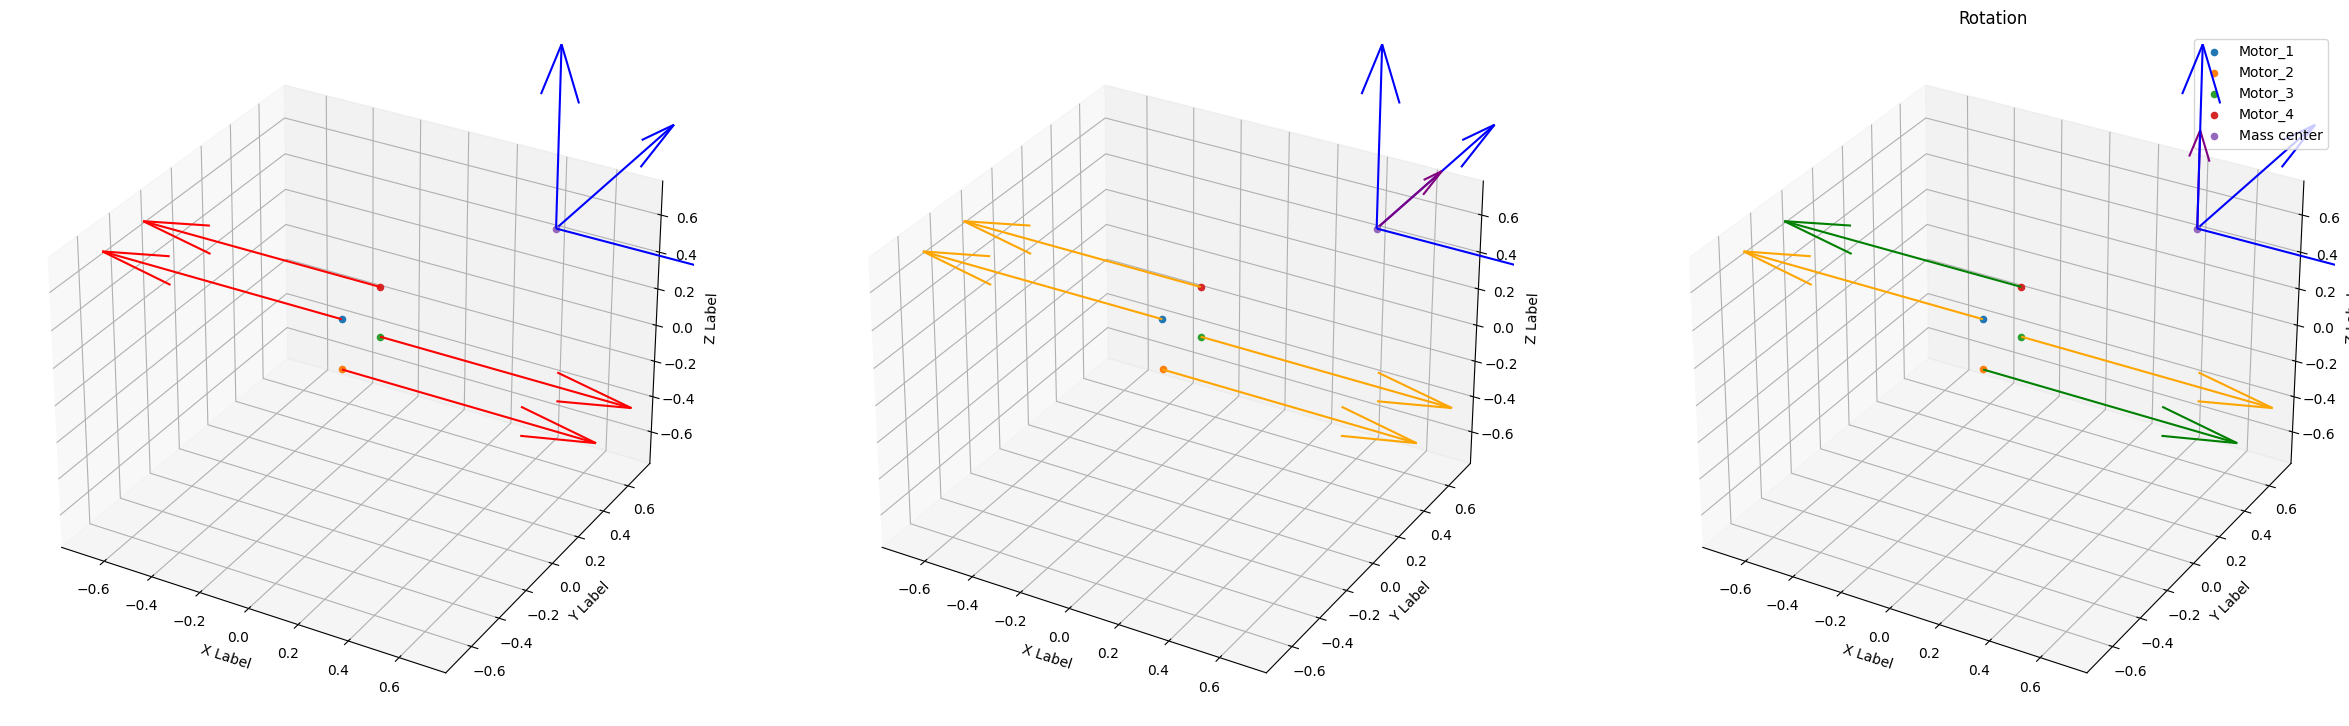

Saved in robot_rot.pdf


In [191]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_rotation)
resltR = rotation(Motors, mass_center, geom_center, lois_rotation)
for k in range(len(lois_rotation)):
    ax = fig.add_subplot(1, len(lois_rotation), k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.75, 0.75)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        if lois_rotation[k][i] == 1:
            color = 'green'
        elif lois_rotation[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")

In [192]:
lois_totale = np.array([
    # [-1,  0, -1,  0,  0, -1,  0, -1],   # Rx
    # [ 0,  1,  1,  0,  1,  0,  0,  1],   # Ry
    # [ 1,  1,  0,  0,  1,  1,  0,  0]    # Rz

    [ 0,  0,  0,  0 ],   # Rx
    [-1, -1, -1, -1 ],   # Ry
    [-1,  1, -1,  1 ],   # Rz
    [-1,  1,  1, -1 ],   # Tx
    [ 0,  0,  0,  0 ],   # Ty
    [ 0,  0,  0,  0 ]    # Tz

    ])


printM(Motors, mass_center, geom_center, lois_totale)

For these laws the translations would be :
        Tx   Ty   Tz
Law 0  0.0  0.0  0.0
Law 1  0.0 -0.0 -0.0
Law 2  0.0  0.0  0.0
Law 3  4.0 -0.0  0.0
Law 4  0.0  0.0  0.0
Law 5  0.0  0.0  0.0


and the rotations :
        Rx    Ry    Rz
Law 0  0.0  0.00  0.00
Law 1  0.0  0.54  0.00
Law 2  0.0  0.00  0.54
Law 3  0.0 -0.04  4.00
Law 4  0.0  0.00  0.00
Law 5  0.0  0.00  0.00


LEGEND :
  Motors :
    Green :  Positif (in the same sense as the vector)
    Orange : Negatif (in the opposite sense as the vector)
    Red :    Null

  Black vector : Translation resultant
  Purple vector : Rotation resultant


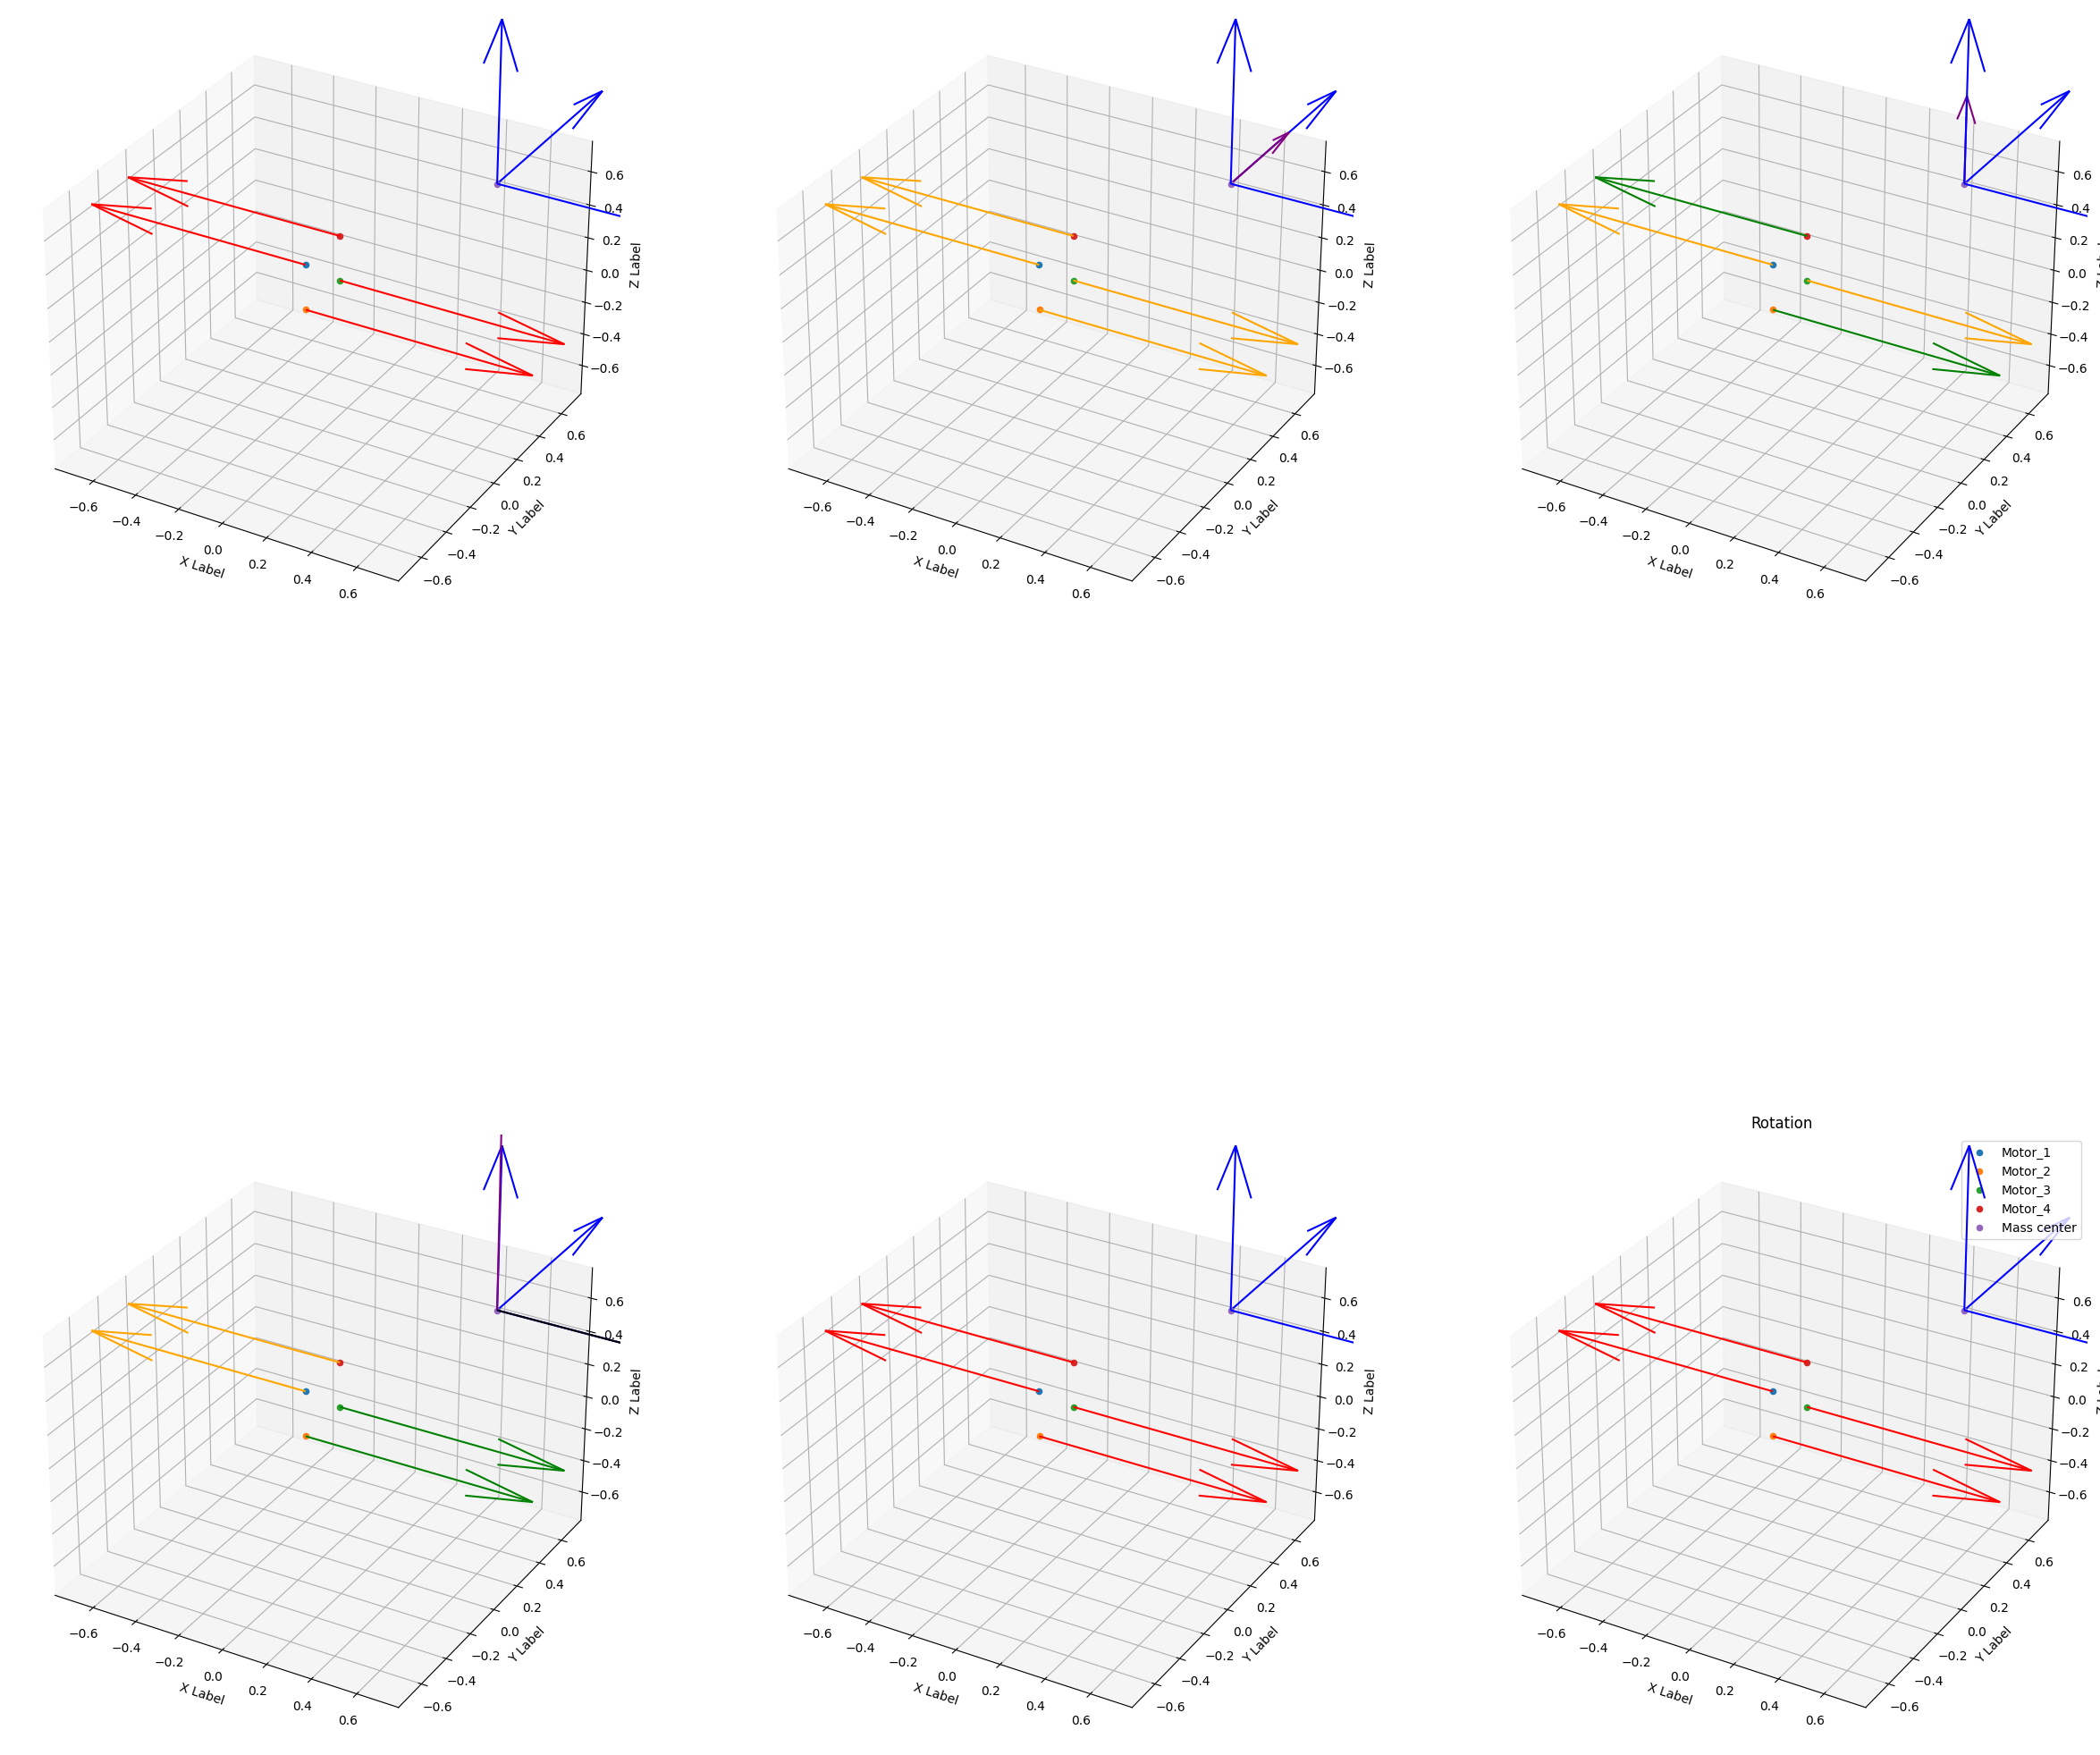

Saved in robot_rot.pdf


In [193]:
print("LEGEND :")
print("  Motors :")
print("    Green :  Positif (in the same sense as the vector)")
print("    Orange : Negatif (in the opposite sense as the vector)")
print("    Red :    Null")
print()
print("  Black vector : Translation resultant")
print("  Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_totale)
resltR = rotation(Motors, mass_center, geom_center, lois_totale)
for k in range(len(lois_totale)):
    ax = fig.add_subplot(2, len(lois_totale)//2, k+1, projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-0.75, 0.75)
    ax.set_ylim(-0.75, 0.75)
    ax.set_zlim(-0.75, 0.75)

    for i, motor in enumerate(Motors):
        if lois_totale[k][i] == 1:
            color = 'green'
        elif lois_totale[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")

## Procédure inverse

Retourver la matrice des lois de commande à partir de la différence du mouvement réel en fonction des mouvements voulus

= annulation des moments pendant les translations

In [194]:
import numpy as np
from scipy.optimize import minimize

In [203]:

def optimize_lois(Motors, mass_center, geom_center, lois_totale, weight=2e0):
    """
    Motors, mass_center, geom_center : configuration mécanique
    lois_totale : (6, n) matrice initiale des lois
    weight : pondération pour les mouvements parasites
    """

    # Mise à plat
    lois_flat = lois_totale.flatten()

    # Fonction objectif : minimiser les translations et rotations parasites
    def objective(lois_var_flat):
        lois_var = lois_var_flat.reshape(lois_totale.shape)

        # Séparer translation (3 premières lignes) et rotation (3 suivantes)
        T = translation(Motors, lois_var[3:])
        R = rotation(Motors, mass_center, geom_center, lois_var[:3])
        Tx, Ty, Tz = T[0], T[1], T[2]
        Rx, Ry, Rz = R[0], R[1], R[2]
        print("Tx, Ty, Tz : ", Tx, Ty, Tz)
        print("Rx, Ry, Rz : ", Rx, Ry, Rz)

        # Ce que l'on veut :
        # => Minimiser tout ce qui n'est pas dans la loi d'origine (c'est à dire parasites)
        cost = 0

        # Ajout des translations parasites
        cost += np.sum(np.abs(Tx)) + np.sum(np.abs(Ty)) + np.sum(np.abs(Tz))
        # Ajout des rotations parasites
        cost += np.sum(np.abs(Rx)) + np.sum(np.abs(Ry)) + np.sum(np.abs(Rz))
        # Contrainte de conservation de la loi d'origine
        cost += weight * np.sum(np.abs(lois_var - lois_totale))

        return cost


    # Résolution avec scipy.optimize.minimize
    result = minimize(
        objective,
        lois_flat,
        method='L-BFGS-B',  # Méthode adaptée aux gros problèmes
        options={'maxiter': 1000, 'disp': True}
    )

    optimized_lois = result.x.reshape(lois_totale.shape)

    # Normalisation : on normalise CHAQUE loi indépendamment
    for i in range(optimized_lois.shape[1]):
        max_abs = np.max(np.abs(optimized_lois[:, i]))
        if max_abs > 1e-8:
            optimized_lois[:, i] /= max_abs

    return optimized_lois

In [204]:
optimized_lois_totale = optimize_lois(Motors, mass_center, geom_center, lois_totale)

Tx, Ty, Tz :  [ 4.0000000e+00 -2.4492936e-16  0.0000000e+00] [0. 0. 0.] [0. 0. 0.]
Rx, Ry, Rz :  [0. 0. 0.] [2.75790459e-16 5.40000000e-01 0.00000000e+00] [0.   0.   0.54]
Tx, Ty, Tz :  [ 4.0000000e+00 -2.4492936e-16  0.0000000e+00] [0. 0. 0.] [0. 0. 0.]
Rx, Ry, Rz :  [-8.49292555e-25 -1.26000000e-09 -1.13500000e-08] [2.75790459e-16 5.40000000e-01 0.00000000e+00] [0.   0.   0.54]
Tx, Ty, Tz :  [ 4.0000000e+00 -2.4492936e-16  0.0000000e+00] [0. 0. 0.] [0. 0. 0.]
Rx, Ry, Rz :  [-6.94987059e-25 -1.44000000e-09  1.13500000e-08] [2.75790459e-16 5.40000000e-01 0.00000000e+00] [0.   0.   0.54]
Tx, Ty, Tz :  [ 4.0000000e+00 -2.4492936e-16  0.0000000e+00] [0. 0. 0.] [0. 0. 0.]
Rx, Ry, Rz :  [-5.29659741e-25 -1.44000000e-09  8.65000000e-09] [2.75790459e-16 5.40000000e-01 0.00000000e+00] [0.   0.   0.54]
Tx, Ty, Tz :  [ 4.0000000e+00 -2.4492936e-16  0.0000000e+00] [0. 0. 0.] [0. 0. 0.]
Rx, Ry, Rz :  [-6.83965237e-25 -1.26000000e-09 -8.65000000e-09] [2.75790459e-16 5.40000000e-01 0.00000000e+00] [

In [205]:
print("Final movement :")
printM(Motors, mass_center, geom_center, optimized_lois_totale)

Final movement :
For these laws the translations would be :
        Tx   Ty   Tz
Law 0  0.0  0.0  0.0
Law 1  0.0 -0.0 -0.0
Law 2  0.0  0.0  0.0
Law 3  4.0 -0.0  0.0
Law 4  0.0  0.0  0.0
Law 5  0.0  0.0  0.0


and the rotations :
        Rx    Ry    Rz
Law 0  0.0  0.00  0.00
Law 1  0.0  0.54  0.00
Law 2  0.0  0.00  0.54
Law 3  0.0 -0.04  4.00
Law 4  0.0  0.00  0.00
Law 5  0.0  0.00  0.00


In [206]:
print("Optimized laws :")
print(optimized_lois_totale)

Optimized laws :
[[ 0.  0.  0.  0.]
 [-1. -1. -1. -1.]
 [-1.  1. -1.  1.]
 [-1.  1.  1. -1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
